# Logstic Regression course

In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib.animation import FuncAnimation
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

In [2]:
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

dataframe = pd.DataFrame(data)
dataframe.columns = columns
dataframe['price'] = target

rm = dataframe['RM']
lstat = dataframe['LSTAT']
price = dataframe['price']

In [3]:
print(np.percentile(price, 66))
greater_then_most = np.percentile(price, 66)

23.53


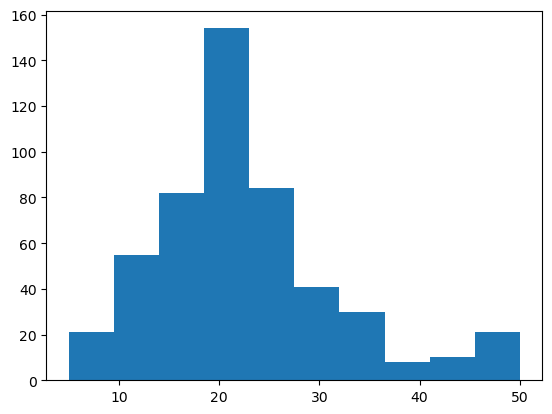

In [4]:
plt.hist(price)
plt.show()

In [5]:
dataframe['expensive'] = dataframe['price'].apply(lambda p: int(p > greater_then_most))
expensive = dataframe['expensive']

# print(dataframe.head())
print(dataframe['expensive'])

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    1
504    0
505    0
Name: expensive, Length: 506, dtype: int64


In [6]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

def model(x, w, b):
    return logistic(np.dot(x, w.T) + b)

def loss(yhat, y):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

def partial_w(x, y, yhat):
    return np.array([np.sum((yhat - y) * x[0]), np.sum((yhat - y) * x[1])])

def partial_b(x, y, yhat):
    return np.sum((yhat - y))

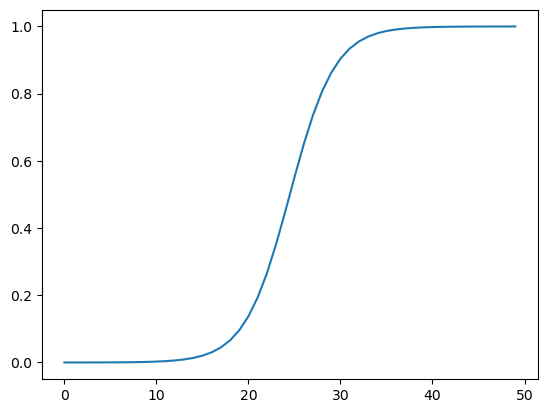

In [7]:
import matplotlib.pyplot as plt
plt.plot(logistic(np.linspace(-10, 10)))
plt.show()

In [8]:
w = np.random.random_sample((1, 2))
b = 0

In [9]:
learning_rate = 1e-5
epoch = 200
losses = []

history_k_b_loss = []

for i in range(epoch):
    batch_loss = []
    for batch in range(len(rm)):
        index = random.choice(range(len(rm)))

        x = np.array([rm[index], lstat[index]])
        y = expensive[index]

        yhat = model(x, w, b)
        loss_v = loss(yhat, y)

        w = w + -1 * partial_w(x, y, yhat) * learning_rate
        b = b + -1 * partial_b(x, y, yhat) * learning_rate

        batch_loss.append(loss_v)
        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss:{}'.format(i, batch, loss_v))
    losses.append(np.mean(batch_loss))

Epoch: 0, Batch: 0, loss:7.423324389581903
Epoch: 0, Batch: 100, loss:6.098701028678157
Epoch: 0, Batch: 200, loss:0.006168233990597316
Epoch: 0, Batch: 300, loss:0.007946298125012678
Epoch: 0, Batch: 400, loss:5.993323507283911
Epoch: 0, Batch: 500, loss:5.2208093279948615
Epoch: 1, Batch: 0, loss:4.782551069935562
Epoch: 1, Batch: 100, loss:4.349358636518212
Epoch: 1, Batch: 200, loss:4.074859886815733
Epoch: 1, Batch: 300, loss:5.726482030839456
Epoch: 1, Batch: 400, loss:0.024126329210688812
Epoch: 1, Batch: 500, loss:0.014240127906530002
Epoch: 2, Batch: 0, loss:0.026714849704776222
Epoch: 2, Batch: 100, loss:4.089418467192985
Epoch: 2, Batch: 200, loss:0.03019278295008122
Epoch: 2, Batch: 300, loss:4.088748346728002
Epoch: 2, Batch: 400, loss:3.585481242809699
Epoch: 2, Batch: 500, loss:0.02248515028403505
Epoch: 3, Batch: 0, loss:0.020168416315315785
Epoch: 3, Batch: 100, loss:0.026453464884980012
Epoch: 3, Batch: 200, loss:2.833716790793818
Epoch: 3, Batch: 300, loss:2.67366463

In [10]:
random_test_indices = np.random.choice(range(len(rm)), size=100)
decision_boundary = 0.5



for i in random_test_indices:
    x1, x2, y = rm[i], lstat[i], expensive[i]
    predicate = model(np.array([x1, x2]), w, b)
    predicate_label = int(predicate > decision_boundary)

    print('RM:{}, LSTAT:{}, EXPENSIVE:{}, Predicated:{}'.format(x1, x2, y, predicate_label))

boston_labels = np.array

RM:5.92, LSTAT:13.65, EXPENSIVE:0, Predicated:0
RM:5.857, LSTAT:21.32, EXPENSIVE:0, Predicated:0
RM:6.482, LSTAT:7.19, EXPENSIVE:1, Predicated:1
RM:5.92, LSTAT:13.65, EXPENSIVE:0, Predicated:0
RM:6.655, LSTAT:17.73, EXPENSIVE:0, Predicated:0
RM:5.942, LSTAT:16.9, EXPENSIVE:0, Predicated:0
RM:5.427, LSTAT:18.14, EXPENSIVE:0, Predicated:0
RM:6.513, LSTAT:10.29, EXPENSIVE:0, Predicated:0
RM:6.852, LSTAT:19.78, EXPENSIVE:1, Predicated:0
RM:6.674, LSTAT:11.98, EXPENSIVE:0, Predicated:0
RM:6.549, LSTAT:7.39, EXPENSIVE:1, Predicated:1
RM:6.064, LSTAT:14.66, EXPENSIVE:1, Predicated:0
RM:7.327, LSTAT:11.25, EXPENSIVE:1, Predicated:0
RM:6.416, LSTAT:9.04, EXPENSIVE:1, Predicated:0
RM:6.781, LSTAT:7.67, EXPENSIVE:1, Predicated:1
RM:6.579, LSTAT:5.49, EXPENSIVE:1, Predicated:1
RM:5.707, LSTAT:12.01, EXPENSIVE:0, Predicated:0
RM:6.193, LSTAT:21.52, EXPENSIVE:0, Predicated:0
RM:6.069, LSTAT:9.55, EXPENSIVE:0, Predicated:0
RM:6.251, LSTAT:14.19, EXPENSIVE:0, Predicated:0
RM:6.417, LSTAT:6.72, EXPENSI

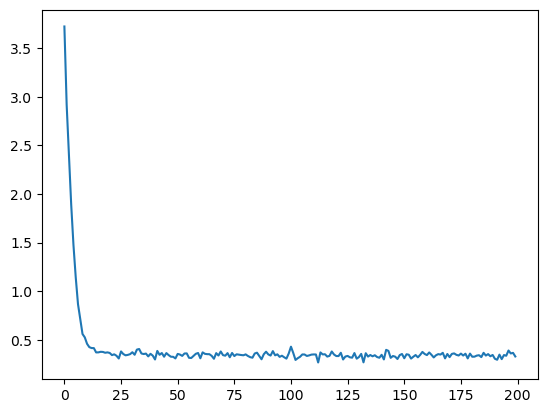

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(losses)

In [12]:
true_label = np.array([1, 0, 1, 0, 1]) # 二分类
predicate_1 = np.array([0.8, 0.7, 0.8, 0.3, 0.8])

In [13]:
def test_lose(y, yhat):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

In [14]:
test_lose(true_label, predicate_1)

2.2300784022072975

![欢迎订阅：坍缩的奇点](../assets/Capture-2023-11-02-164446.png)